# 实验二：回归模型

* 姓名：彭钰婷
* 学号：2013631
* 专业：计算机科学与技术

## 实验要求

* 回归是监督学习的一个重要问题，回归用于预测**输入变量**和**输出变量**之间的关系，特别是当输入变量的值发生变化时，输出变量的值也随之发生变化
* 回归模型是一种表示从输入变量到输出变量之间映射的函数
* 对连续值的预测
* 可以用合适的曲线揭示样本点随着自变量的变化关系

### 基本要求

将数据集winequality-white.csv按照4:1划分为训练集和测试集。 
1. 构造线性回归模型，并采用批量梯度下降和随机梯度下降进行优化；输出训练集和测试集的均方误差（MSE），画出MSE收敛曲线。
2. 对于批量梯度下降和随机梯度下降，采用不同的学习率并进行MSE曲线展示，分析选择最佳的学习率。  
特别需要注意：
* 划分数据集时尽可能保持数据分布的一致性，保持样本类别比例相似，可采用分层采样的方式。
* 需要对数据集进行一定的预处理

### 中级要求

探究回归模型在机器学习和统计学上的差异。  
* 回归模型在机器学习领域和统计学领域中都十分常用，而且使用方法也相似，但其实际的含义具有本质的区别。我们希望同学们从回归模型的角度更加充分地理解机器学习和统计学的区别。

### 高级要求

编程实现岭回归算法，求解训练样本的岭回归模型，平均训练误差和平均测试误差（解析法、批量梯度下降法和随机梯度下降法均可）。

## I . 基本要求

### 1 对数据集进行预处理
对数据集的预处理是一个十分重要的步骤，能够使不同量纲的特征处于同一数值量级，减少方差大的特征的影响，使模型更准确，并加快学习算法的收敛速度。

常用的预处理方法有：标准化、归一化和中心化。同学们根据需要从中选择一种或几种方法进行预处理（采用其他方法亦可）。

### 2 winequality-white数据集

In [40]:
import pandas as pd
import numpy as np
data = pd.read_csv("winequality-white.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [41]:
# 中心化代码
def Normalization_fun(x):
    # 特征零均值
    x = (x - np.mean(x, 0)) / (np.max(x, 0) - np.min(x, 0))
    return x

# 提取特征和标签
X = data.iloc[:, 0:-1]  # N D
X = Normalization_fun(X)
Y = data.iloc[:, -1]

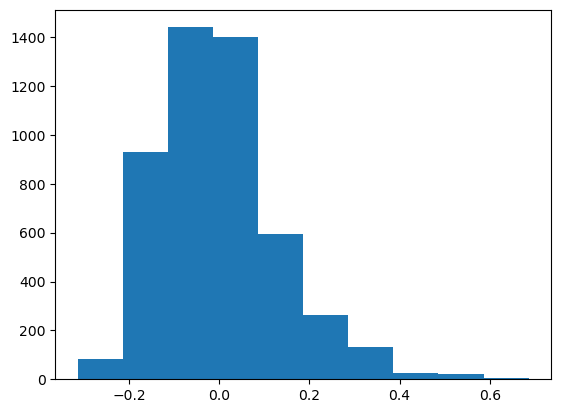

In [42]:
# 可视化中心化后的sulphates特征
import matplotlib.pyplot as plt
plt.hist(X["sulphates"])
plt.show()

In [43]:
# 这里注意一个小trick：回归系数会比特征x多一维，为了向量相乘方便，可以在训练集X左侧添加全为1的一列
data0 = pd.concat([pd.DataFrame(np.ones(X.shape[0]), columns=['x0']), X], axis=1)
data0

,x0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.0,0.013963,-0.008080,0.015547,0.219457,-0.002292,0.033770,0.073409,0.134425,-0.171151,-0.046334,-0.276495
1,1.0,-0.053345,0.021332,0.003499,-0.073488,0.009578,-0.074244,-0.014758,-0.000528,0.101576,0.000178,-0.163591
2,1.0,0.119732,0.001724,0.039644,0.007800,0.012545,-0.018495,-0.095964,0.020679,0.065212,-0.057961,-0.066817
3,1.0,0.033193,-0.047295,-0.008549,0.032340,0.036284,0.040738,0.110532,0.030319,0.001576,-0.104473,-0.099075
4,1.0,0.033193,-0.047295,-0.008549,0.032340,0.036284,0.040738,0.110532,0.030319,0.001576,-0.104473,-0.099075
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,1.0,-0.062960,-0.066903,-0.026621,-0.073488,-0.020096,-0.039401,-0.107565,-0.055666,0.074303,0.011806,0.110602
4894,1.0,-0.024499,0.040940,0.015547,0.024672,0.003643,0.075582,0.068769,0.016823,-0.034788,-0.034706,-0.147462
4895,1.0,-0.034114,-0.037491,-0.086862,-0.079623,-0.014161,-0.018495,-0.063482,-0.028675,-0.180242,-0.034706,-0.179720
4896,1.0,-0.130268,0.011528,-0.020597,-0.081157,-0.070541,-0.053338,-0.065802,-0.102899,0.137939,-0.127729,0.368667


In [44]:
# 初始化回归系数
# W_init = np.random.randn(data0.shape[1], 1)
W_init = np.random.randn(data0.shape[1])
W_init

array([ 1.88702762,  1.57076578,  1.18517404, -0.29348565,  0.52243554,
       -0.47218886,  0.9317266 , -0.95763843, -0.43755492,  0.76213964,
        2.08128259, -0.23058939])

In [45]:
# 划分数据集
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data0, Y, test_size = 0.2,stratify=Y) #分层采样

### 3 批量梯度下降

In [46]:
def BGD(x_train, y_train, x_test, y_test, theta, epoch, learning_rate):# theta就是W_init
    loss = []
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    # 循环epoch次
    for index in range(epoch):
        gradients = x_train.T.dot(x_train.dot(theta) - y_train) / len(x_train)# 计算梯度
        theta = theta - learning_rate * gradients# 更新权重
        MSE = ((np.dot(x_test, theta) - y_test) ** 2).sum() / len(x_test)# 计算MSE
        loss.append(MSE)
    return theta, loss

#### 输出训练集和测试集的均方误差（MSE）

In [47]:
# 初始学习率为0.5
epoch=1000
theta, loss = BGD(x_train, y_train, x_test, y_test, W_init, epoch, learning_rate = 0.5)
MSE_train = ((np.dot(x_train, theta) - y_train) ** 2).sum() / len(x_train)# 计算MSE
MSE_test = ((np.dot(x_test, theta) - y_test) ** 2).sum() / len(x_test)# 计算MSE
print("使用BGD，训练集的均方误差为{0}，测试集的均方误差为{1}".format(MSE_train, MSE_test))

使用BGD，训练集的均方误差为0.5661560663070779，测试集的均方误差为0.5837279406071528


#### 画出MSE收敛曲线

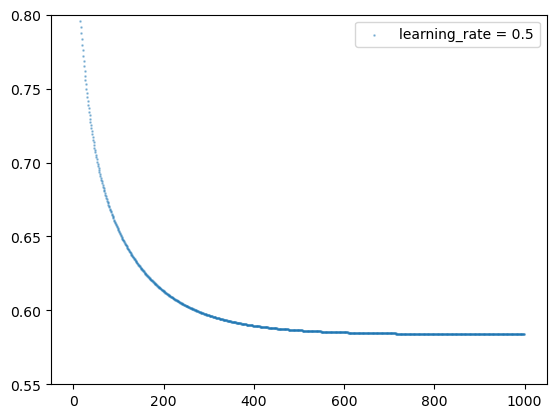

In [48]:
# 画散点图
ls = []
for i in range(1000):
    ls.append(i)
x = np.array(ls)
import matplotlib.pyplot as plt
area = np.pi * 0.5**2  # 点面积
plt.ylim(0.55, 0.80)
plt.scatter(x, loss, s=area, alpha=0.4, label='learning_rate = 0.5')
plt.legend()
plt.show()

#### 采用不同的学习率，进行MSE曲线展示
* 首先，尝试学习率0.5、0.3、0.1、0.01、0.001，画出图像：

In [49]:
epoch = 1000
theta1_BGD, loss1_BGD = BGD(x_train, y_train, x_test, y_test, W_init, epoch, learning_rate = 0.5)
theta2_BGD, loss2_BGD = BGD(x_train, y_train, x_test, y_test, W_init, epoch, learning_rate = 0.3)
theta3_BGD, loss3_BGD = BGD(x_train, y_train, x_test, y_test, W_init, epoch, learning_rate = 0.1)
theta4_BGD, loss4_BGD = BGD(x_train, y_train, x_test, y_test, W_init, epoch, learning_rate = 0.01)
theta5_BGD, loss5_BGD = BGD(x_train, y_train, x_test, y_test, W_init, epoch, learning_rate = 0.001)

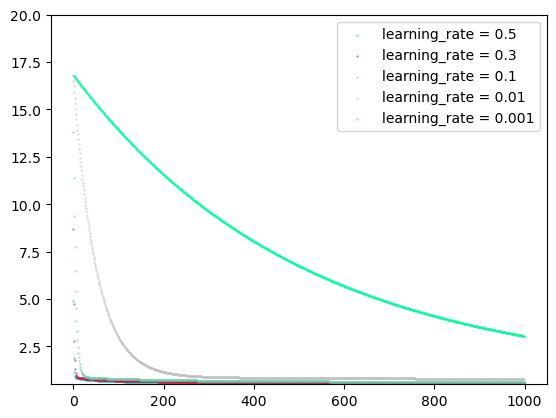

In [50]:
colors0 = '#000000'
colors1 = '#00CED1' #点的颜色
colors2 = '#DC143C'
colors3 = '#66CDAA'
colors4 = '#BEBEBE'
colors5 = '#00FA9A'
plt.ylim(0.5, 20)
plt.scatter(x, loss1_BGD, s=area, c=colors1, alpha=0.4, label='learning_rate = 0.5')
plt.scatter(x, loss2_BGD, s=area, c=colors2, alpha=0.4, label='learning_rate = 0.3')
plt.scatter(x, loss3_BGD, s=area, c=colors3, alpha=0.4, label='learning_rate = 0.1')
plt.scatter(x, loss4_BGD, s=area, c=colors4, alpha=0.4, label='learning_rate = 0.01')
plt.scatter(x, loss5_BGD, s=area, c=colors5, alpha=0.4, label='learning_rate = 0.001')
plt.legend()
plt.show()

* 可以看到，学习率=0.001时，由于步长太小，MSE显著大于其他学习率；此外，学习率=0.01时，MSE同样明显大于其他学习率。我们除去这2种情况，将纵坐标缩小，再次尝试：

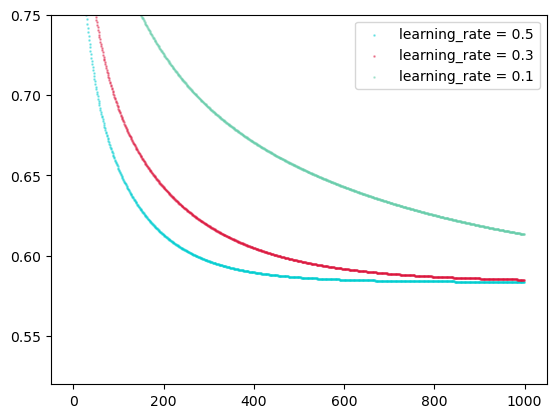

In [51]:
plt.ylim(0.52, 0.75)
plt.scatter(x, loss1_BGD, s=area, c=colors1, alpha=0.4, label='learning_rate = 0.5')
plt.scatter(x, loss2_BGD, s=area, c=colors2, alpha=0.4, label='learning_rate = 0.3')
plt.scatter(x, loss3_BGD, s=area, c=colors3, alpha=0.4, label='learning_rate = 0.1')
plt.legend()
plt.show()

* 可以看到，学习率=0.5时MSE最低，因此**选择最佳学习率为0.5**。

### 4 随机梯度下降

In [52]:
def SGD(x_train, y_train, x_test, y_test, theta, epoch, learning_rate = 0.5):# theta就是W_init
    loss = []    
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    y_train = np.array(y_train)
    # 循环epochs次
    for index in range(epoch):
        rand = np.random.randint(0,x_train.shape[0]-1)# 生成随机数
        x_rand = x_train[rand, :]
        y_rand = y_train[rand]
        gradients = x_rand.T.dot(x_rand.dot(theta) - y_rand)# 计算梯度
        theta = theta - learning_rate * gradients# 更新权重
        MSE = ((np.dot(x_test, theta) - y_test) ** 2).sum() / len(x_test)# 计算MSE
        loss.append(MSE)
    return theta, loss

#### 输出训练集和测试集的均方误差（MSE）

In [53]:
# 初始学习率为0.5
epoch=1000
theta, loss = SGD(x_train, y_train, x_test, y_test, W_init, epoch, learning_rate = 0.5)
MSE_train = ((np.dot(x_train, theta) - y_train) ** 2).sum() / len(x_train)# 计算MSE
MSE_test = ((np.dot(x_test, theta) - y_test) ** 2).sum() / len(x_test)# 计算MSE
print("使用SGD，训练集的均方误差为{0}，测试集的均方误差为{1}".format(MSE_train, MSE_test))

使用SGD，训练集的均方误差为0.6896806382730188，测试集的均方误差为0.6731123811361054


#### 画出MSE收敛曲线

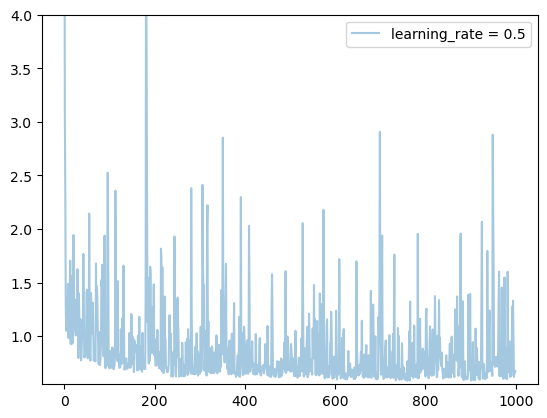

In [54]:
plt.ylim(0.55, 4)
plt.plot(x, loss, alpha=0.4, label='learning_rate = 0.5')
plt.legend()
plt.show()

可以看到，由于随即梯度下降每次只选取了小部分样本，所以模型抖动明显，MSE无法收敛。
#### 采用不同的学习率，进行MSE曲线展示
* 首先，尝试学习率0.5、0.3、0.1、0.01、0.001，画出图像：

In [55]:
epoch = 1000
theta1_SGD, loss1_SGD = SGD(x_train, y_train, x_test, y_test, W_init, epoch, learning_rate = 0.5)
theta2_SGD, loss2_SGD = SGD(x_train, y_train, x_test, y_test, W_init, epoch, learning_rate = 0.3)
theta3_SGD, loss3_SGD = SGD(x_train, y_train, x_test, y_test, W_init, epoch, learning_rate = 0.1)
theta4_SGD, loss4_SGD = SGD(x_train, y_train, x_test, y_test, W_init, epoch, learning_rate = 0.01)
theta5_SGD, loss5_SGD = SGD(x_train, y_train, x_test, y_test, W_init, epoch, learning_rate = 0.001)

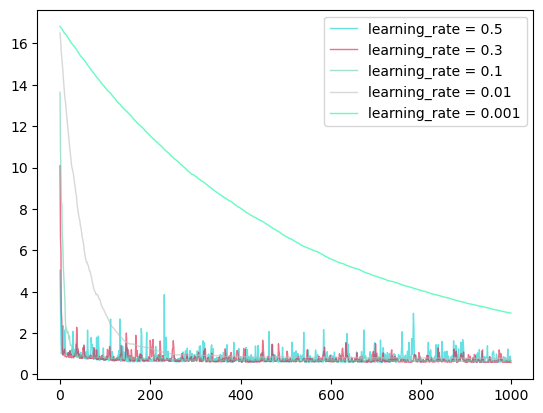

In [56]:
plt.plot(x, loss1_SGD, color=colors1, linewidth=1, alpha=0.6, label='learning_rate = 0.5')
plt.plot(x, loss2_SGD, color=colors2, linewidth=1, alpha=0.6, label='learning_rate = 0.3')
plt.plot(x, loss3_SGD, color=colors3, linewidth=1, alpha=0.6, label='learning_rate = 0.1')
plt.plot(x, loss4_SGD, color=colors4, linewidth=1, alpha=0.6, label='learning_rate = 0.01')
plt.plot(x, loss5_SGD, color=colors5, linewidth=1, alpha=0.6, label='learning_rate = 0.001')
plt.legend()
plt.show()

* 可以看到，学习率=0.001、0.01时，由于步长太小，MSE显著大于其他学习率；学习率=0.5时，MSE同样大于剩余学习率下的MSE。我们除去这3种情况，将纵坐标缩小到(0.5,0.8)范围，再次尝试：

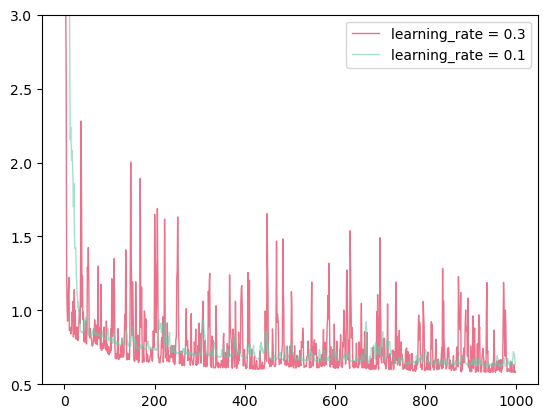

In [57]:
plt.ylim(0.5, 3)
plt.plot(x, loss2_SGD, color=colors2, linewidth=1, alpha=0.6, label='learning_rate = 0.3')
plt.plot(x, loss3_SGD, color=colors3, linewidth=1, alpha=0.6, label='learning_rate = 0.1')
plt.legend()
plt.show()

* 可以看到，虽然学习率0.3时出现最低MSE，但该学习率抖动非常大，且峰值极高，平均值高于0.1学习率对应的MSE。因此**选择最佳学习率为0.1**。

## II . 回归模型在机器学习和统计学上的差异

* 假设程度差异：统计学上的回归模型基于一系列的假设，例如线性回归模型假设自变量和因变量线性相关、同方差、波动均值为0、观测样本相互独立、波动服从正态分布。而机器学习并不需要假设自变量或因变量的分布，就能直接模拟数据。
* 实现方法差异：统计模型只需求得一条可以最小化所有数据的均方误差的线，无需训练和测试；机器学习需要获得可重复预测的模型，需要训练和测试。
* 目标差异：统计学中的回归更关注变量间的关系和这些关系的重要性，不太关心预测，可以用数学式清楚解释；机器学习更关注预测准确性，其工作原理较黑盒化，难以证明数据间的关系，对结果的可解释性较弱。
* 评估方法差异：统计学中的回归模型使用置信区间、显著性检验等其他检验评估，机器学习中的回归模型使用测试集的评价指标（如acc,precision,f1-score等）评估。
* 数据差异：统计学求解参数矩阵时考虑所有数据，计算过程较复杂；而机器学习划分了测试集和训练集，还会使用随机梯度下降方法，没有使用全部数据，计算过程较简单。
* 统计学仅基于概率空间。（注：概率空间由(Ω,F,P)三部分组成，其中Ω表示所有可能结果的集合，F表示事件，P表示时间的概率）

## III . 岭回归

### 1 批量梯度下降法

In [58]:
# 下面实现批量下降梯度算法
# 此算法的theta更新公式中有四个参数，X,Y,theta,alpha
# 另外需要定义一个迭代次数num_iters，就是更新多少次（alpha走多少步）才能下降到最低点，每迭代一次，theta就更新一次
def ridge_BGD(X,Y,theta,alpha,lamba,epoch):
    m=X.shape[0]
    loss_all=[]  #定义loss值列表，把每次theta更新时跟着变动的loss函数值存入展示
    for i in range(epoch):
    #参数的更新公式向量化如下两行代码
        theta=theta-alpha*np.dot(X.T,np.dot(X,theta)-Y)/m
        theta[:-1]=theta[:-1]-alpha*(lamba/m)*theta[:-1]
    return theta

In [59]:
epoch=1000  #迭代次数
alpha=0.01  #初始化α（下降步长）为0.01
lamba=0.05  #参数lambda
theta=ridge_BGD(x_train,y_train,W_init,alpha,lamba,epoch) #调用BGD函数求theta更新参数，和每次更新后的loss函数值
MSE_train = ((np.dot(x_train, theta) - y_train) ** 2).sum() / len(x_test)# 计算MSE
MSE_test = ((np.dot(x_test, theta) - y_test) ** 2).sum() / len(x_test)# 计算MSE
print("使用解析法的岭回归模型，平均训练误差为{0}，平均测试误差为{1}。".format(MSE_train, MSE_test))

使用解析法的岭回归模型，平均训练误差为3.089431643444252，平均测试误差为0.7840910085657727。


### 2 解析法

In [60]:
def ridge_analytic(x_train, y_train, lam=0.2):  # 设置岭系数为0.2
    xMat = np.mat(x_train)# 3918*12
    yMat = np.mat(y_train)# 1*3918
    yMat = yMat.T# 3918*1
    xTx = xMat.T * xMat  # 矩阵乘法  (12*3918)*(3918*12)=（12*12）
    rxTx = xTx + np.eye(xMat.shape[1]) * lam  # 岭回归求解的括号的部分
    # 计算矩阵的值,如果值为0，说明该矩阵没有逆矩阵
    if np.linalg.det(rxTx) == 0.0:
        print("This matrix cannot do inverse")
        return
    # rxTx.I为rxTx的逆矩阵
    # 计算得theta
    theta = rxTx.I * xMat.T * yMat
    return theta

In [61]:
theta_old = ridge_analytic(x_train, y_train)
theta = []
for t in theta_old:
    theta.append(float(t))
MSE_train = ((np.dot(x_train, theta) - y_train) ** 2).sum() / len(x_test)# 计算MSE
MSE_test = ((np.dot(x_test, theta) - y_test) ** 2).sum() / len(x_test)# 计算MSE
print("使用解析法的岭回归模型，平均训练误差为{0}，平均测试误差为{1}。".format(MSE_train, MSE_test))

使用解析法的岭回归模型，平均训练误差为2.242871186443867，平均测试误差为0.5785247658063194。
